# Table of Contents

1. [Opening](#Opening)
2. [Data loading manually and from CSV files to Pandas DataFrame](#Data-loading-manually-and-from-CSV-files-to-Pandas-DataFrame)
3. [Loading, editing, and viewing data from Pandas DataFrame](#Loading,-editing,-and-viewing-data-from-Pandas-DataFrame)
4. [Renaming colmnns, exporting and saving Pandas DataFrames](#Renaming-colmnns,-exporting-and-saving-Pandas-DataFrames)
5. [Summarising, grouping, and aggregating data in Pandas](#Summarising,-grouping,-and-aggregating-data-in-Pandas)
6. [Merge and join DataFrames with Pandas](#Merge-and-join-DataFrames-with-Pandas)
7. [Basic Plotting Pandas DataFrames](#Basic-Plotting-Pandas-DataFrames)

## Opening
CSV(comma-separated value) files are a common file format of data. 
The ability to read, manipulate, and write date to and from CSV files using Python is a key skill to master for any data scientist or business analysis. 
1) what CSV files are, 
2) how to read CSV files into "Pandas DataFrames", 
3) how to write DataFrames back to CSV files. 

What is "Pandas DataFrame"? 
: Pandas is the most popular data manipulation package in Python, and DataFrames are the Pandas data type for storing tabular 2D data. 
: Pandas development started in 2008 with main developer Wes McKinney and the library has become a standard for data analysis and management using Python. 
: Pandas fluency is essential for any Python-based data professional, people interested in trying a Kaggle challenge, or anyone seeking to automate a data process. 
: The Pandas library documentation defines a DataFrame as a “two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)”. 
- There can be multiple rows and columns in the data. 
- Each row represents a sample of data, 
- Each column contains a different variable that describes the samples (rows). 
- The data in every column is usually the same type of data – e.g. numbers, strings, dates. 
- Usually, unlike an excel data set, DataFrames avoid having missing values, and there are no gaps and empty values between rows or columns. 

In [57]:
# Manually generate data
import pandas as pd
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10

data = {'column1':[1,2,3,4,5],
        'anatoeh_column':['this', 'column', 'has', 'strings', 'indise!'],
        'float_column':[0.1, 0.5, 33, 48, 42.5555],
        'binary_column':[True, False, True, True, False]}
print(data)
print(data['column1'])
display(pd.DataFrame(data))
display(pd.DataFrame(data['column1']))

{'column1': [1, 2, 3, 4, 5], 'anatoeh_column': ['this', 'column', 'has', 'strings', 'indise!'], 'float_column': [0.1, 0.5, 33, 48, 42.5555], 'binary_column': [True, False, True, True, False]}
[1, 2, 3, 4, 5]


,column1,anatoeh_column,float_column,binary_column
0,1,this,0.1000,True
1,2,column,0.5000,False
2,3,has,33.0000,True
3,4,strings,48.0000,True
4,5,indise!,42.5555,False


,0
0,1
1,2
2,3
3,4
4,5


## Data loading manually and from CSV files to Pandas DataFrame
There are 3 fundamantal conceps to grasp and debug the operation of the data loading procedure. 
1) Understanding file extensions and file types – what do the letters CSV actually mean? what’s the difference between a .csv file and a .txt file? 
2) Understanding how data is represented inside CSV files – if you open a CSV file, what does the data actually look like? 
3) Understanding the Python path and how to reference a file – what is the absolute and relative path to the file you are loading? What directory are you working in? 
4)! CSV file loading errors
- FileNotFoundError: File b'filename.csv' does not exist 
=> A File Not Found error is typically an issue with path setup, current directory, or file name confusion (file extension can play a part here!)
- UnicodeDecodeError: 'utf-8' codec can't decode byte in position : invalid continuation byte 
=> A Unicode Decode Error is typically caused by not specifying the encoding of the file, and happens when you have a file with non-standard characters. For a quick fix, try opening the file in Sublime Text, and re-saving with encoding ‘UTF-8’.
- pandas.parser.CParserError: Error tokenizing data. 
=> Parse Errors can be caused in unusual circumstances to do with your data format – try to add the parameter “engine=’python'” to the read_csv function call; this changes the data reading function internally to a slower but more stable method.

In [58]:
# Finding your Python path
# The "OS module" is for operating system dependent functionality into Python
import os
print(os.getcwd())
print(os.listdir())
# os.chdir("path")

X:\Lecture
['.ipDISK.db', '.ipynb_checkpoints', 'Data', 'Time_Series_Analysis_with_Python', 'Tutorial_Pandas_20190121_KK.ipynb']


In [59]:
# File Loading from "Absolute" and "Relative" paths
# Relative paths are directions to the file starting at your current working directory, where absolute paths always start at the base of your file system.
# direct_path : 'https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/FAO+database.csv' from 'https://www.kaggle.com/dorbicycle/world-foodfeed-production'
absolute_path = 'C:\\Users\\KK\\Desktop\\FAO+database.csv'
pd.read_csv(absolute_path, sep=',')

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [60]:
relative_path = '..\\Lecture\\Data\\FAO+database.csv'
pd.read_csv(relative_path, sep=',')

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [61]:
pd.options.display.max_columns = 20
relative_path = '..\\Lecture\\Data\\FAO+database.csv'
raw_data = pd.read_csv(relative_path, sep=',')
raw_data

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Loading, editing, and viewing data from Pandas DataFrame
Pandas displays only 20 columns by default for wide data dataframes, and only 60 or so rows, truncating the middle section. 
If you’d like to change these limits, you can edit the defaults using some internal options for Pandas displays
(simple use pd.display.options.XX = value to set these) 
- pd.options.display.width – the width of the display in characters – use this if your display is wrapping rows over more than one line.
- pd.options.display.max_rows – maximum number of rows displayed.
- pd.options.display.max_columns – maximum number of columns displayed. 

Finally, to see some of the core statistics about a particular column, you can use the ‘describe‘ function.
- For numeric columns, describe() returns basic statistics: the value count, mean, standard deviation, minimum, maximum, and 25th, 50th, and 75th quantiles for the data in a column. 
- For string columns, describe() returns the value count, the number of unique entries, the most frequently occurring value (‘top’), and the number of times the top value occurs (‘freq’)

There’s two main options to achieve the selection and indexing activities in Pandas. 
When using .loc, or .iloc, you can control the output format by passing lists or single values to the selectors. 
1. iloc
    - Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.
    - When selecting multiple columns or multiple rows in this manner, remember that in your selection e.g.[1:5], the rows/columns selected will run from the first number to one minus the second number. e.g. [1:5] will go 1,2,3,4., [x,y] goes from x to y-1.
2. loc
    - Label-based / Index-based indexing
    - Boolean / Logical indexing
        - You pass an array or Series of True/False values to the .loc indexer to select the rows where your Series has True values.

Selecting rows and columns
- using a dot notation, e.g. data.column_name,
- using square braces and the name of the column as a string, e.g. data['column_name']
- using numeric indexing and the iloc selector data.iloc[:, <column_number>] 

When a column is selected using any of these methodologies, a pandas.Series is the resulting datatype. A pandas series is a one-dimensional set of data.
- square-brace selection with a list of column names, e.g. data[['column_name_1', 'column_name_2']]
- using numeric indexing with the iloc selector and a list of column numbers, e.g. data.iloc[:, [0,1,20,22]]

Rows in a DataFrame are selected, typically, using the iloc/loc selection methods, or using logical selectors
- numeric row selection using the iloc selector, e.g. data.iloc[0:10, :] – select the first 10 rows.
- label-based row selection using the loc selector (this is only applicably if you have set an “index” on your dataframe. e.g. data.loc[44, :]
- logical-based row selection using evaluated statements, e.g. data[data["Area"] == "Ireland"] – select the rows where Area value is ‘Ireland’.
![](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-768x549.png)

To delete rows and columns from DataFrames, Pandas uses the “drop” function.
- To delete a column, or multiple columns, use the name of the column(s), and specify the “axis” as 1.
- Alternatively, as in the example below, the ‘columns’ parameter has been added in Pandas which cuts out the need for ‘axis’.
- The drop function returns a new DataFrame, with the columns removed. To actually edit the original DataFrame, the “inplace” parameter can be set to True, and there is no returned value.
- Rows can also be removed using the “drop” function, by specifying axis=0. Drop() removes rows based on “labels”, rather than numeric indexing. To delete rows based on their numeric position / index, use iloc to reassign the dataframe values

In [11]:
# Examine data in a Pandas DataFrame
raw_data.shape

(21477, 63)

In [12]:
raw_data.ndim

2

In [14]:
raw_data.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [15]:
raw_data.tail(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21476,ZW,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [62]:
raw_data.dtypes

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
Length: 63, dtype: object

In [63]:
raw_data['Item Code'] = raw_data['Item Code'].astype(str)
raw_data.dtypes

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code             object
Item                  object
                      ...   
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
Length: 63, dtype: object

In [18]:
raw_data['Y2013'].describe()

count     21477.000000
mean        575.557480
std        6218.379479
min        -246.000000
25%           0.000000
50%           8.000000
75%          90.000000
max      489299.000000
Name: Y2013, dtype: float64

In [19]:
raw_data['Area'].describe()

count     21477
unique      174
top       Spain
freq        150
Name: Area, dtype: object

In [21]:
raw_data.describe()

,Area Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,225.988962,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,2100.228354,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,118495.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [64]:
# Selecting and manipulating data
raw_data.iloc[0]

Area Abbreviation                    AF
Area Code                             2
Area                        Afghanistan
Item Code                          2511
Item                 Wheat and products
                            ...        
Y2009                              4538
Y2010                              4605
Y2011                              4711
Y2012                              4810
Y2013                              4895
Name: 0, Length: 63, dtype: object

In [65]:
raw_data.iloc[[1]]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


In [66]:
raw_data.iloc[[-1]]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21476,ZW,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [67]:
raw_data.iloc[:,0]

0        AF
1        AF
2        AF
3        AF
4        AF
         ..
21472    ZW
21473    ZW
21474    ZW
21475    ZW
21476    ZW
Name: Area Abbreviation, Length: 21477, dtype: object

In [68]:
raw_data.iloc[:,[1]]

,Area Code
0,2
1,2
2,2
3,2
4,2
...,...
21472,181
21473,181
21474,181
21475,181


In [69]:
raw_data.iloc[:,[-1]]

,Y2013
0,4895
1,422
2,360
3,89
4,200
...,...
21472,451
21473,15
21474,40
21475,0


In [70]:
raw_data.iloc[0:5]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [71]:
raw_data.iloc[:,0:2]

,Area Abbreviation,Area Code
0,AF,2
1,AF,2
2,AF,2
3,AF,2
4,AF,2
...,...,...
21472,ZW,181
21473,ZW,181
21474,ZW,181
21475,ZW,181


In [72]:
raw_data.iloc[[0,3,6,24],[0,5,6]]

,Area Abbreviation,Element Code,Element
0,AF,5142,Food
3,AF,5142,Food
6,AF,5142,Food
24,AF,5142,Food


In [73]:
raw_data.iloc[0:5, 5:8]

,Element Code,Element,Unit
0,5142,Food,1000 tonnes
1,5142,Food,1000 tonnes
2,5521,Feed,1000 tonnes
3,5142,Food,1000 tonnes
4,5521,Feed,1000 tonnes


In [74]:
raw_data.loc[0]

Area Abbreviation                    AF
Area Code                             2
Area                        Afghanistan
Item Code                          2511
Item                 Wheat and products
                            ...        
Y2009                              4538
Y2010                              4605
Y2011                              4711
Y2012                              4810
Y2013                              4895
Name: 0, Length: 63, dtype: object

In [75]:
raw_data.loc[[1]]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


In [76]:
raw_data.loc[[1,3]]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89


In [77]:
raw_data.loc[[1,3],['Item','Y2013']]

,Item,Y2013
1,Rice (Milled Equivalent),422
3,Barley and products,89


In [78]:
raw_data.loc[[1,3],'Item':'Y2013']

,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89


In [79]:
raw_data.loc[1:3,'Item':'Y2013']

,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89


In [80]:
raw_data_test = raw_data.loc[10:,'Item':'Y2013']
raw_data_test.iloc[[0]]

,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [81]:
raw_data_test.loc[[10]]

,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [82]:
raw_data.loc[raw_data['Item'] == 'Sugar beet']

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10,AF,2,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
103,AL,3,Albania,2537,Sugar beet,5521,Feed,1000 tonnes,41.15,20.17,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
699,AM,1,Armenia,2537,Sugar beet,5521,Feed,1000 tonnes,40.07,45.04,...,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,0,1
832,AU,10,Australia,2537,Sugar beet,5521,Feed,1000 tonnes,-25.27,133.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1099,AZ,52,Azerbaijan,2537,Sugar beet,5521,Feed,1000 tonnes,40.14,47.58,...,1.0,1.0,4.0,3.0,4.0,4.0,6.0,6.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,AE,225,United Arab Emirates,2537,Sugar beet,5521,Feed,1000 tonnes,23.42,53.85,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
20676,UZ,235,Uzbekistan,2537,Sugar beet,5521,Feed,1000 tonnes,41.38,64.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
20900,VE,236,Venezuela (Bolivarian Republic of),2537,Sugar beet,5142,Food,1000 tonnes,6.42,-66.59,...,17.0,20.0,23.0,21.0,21.0,21.0,30.0,35.0,20,22
21135,YE,249,Yemen,2537,Sugar beet,5521,Feed,1000 tonnes,15.55,48.52,...,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0,0


In [83]:
# is same as
raw_data[raw_data['Item'] == 'Sugar beet']

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10,AF,2,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
103,AL,3,Albania,2537,Sugar beet,5521,Feed,1000 tonnes,41.15,20.17,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
699,AM,1,Armenia,2537,Sugar beet,5521,Feed,1000 tonnes,40.07,45.04,...,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,0,1
832,AU,10,Australia,2537,Sugar beet,5521,Feed,1000 tonnes,-25.27,133.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1099,AZ,52,Azerbaijan,2537,Sugar beet,5521,Feed,1000 tonnes,40.14,47.58,...,1.0,1.0,4.0,3.0,4.0,4.0,6.0,6.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,AE,225,United Arab Emirates,2537,Sugar beet,5521,Feed,1000 tonnes,23.42,53.85,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
20676,UZ,235,Uzbekistan,2537,Sugar beet,5521,Feed,1000 tonnes,41.38,64.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
20900,VE,236,Venezuela (Bolivarian Republic of),2537,Sugar beet,5142,Food,1000 tonnes,6.42,-66.59,...,17.0,20.0,23.0,21.0,21.0,21.0,30.0,35.0,20,22
21135,YE,249,Yemen,2537,Sugar beet,5521,Feed,1000 tonnes,15.55,48.52,...,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0,0


In [84]:
raw_data.loc[raw_data['Item'] == 'Sugar beet', 'Area']

10                              Afghanistan
103                                 Albania
699                                 Armenia
832                               Australia
1099                             Azerbaijan
                        ...                
20020                  United Arab Emirates
20676                            Uzbekistan
20900    Venezuela (Bolivarian Republic of)
21135                                 Yemen
21374                              Zimbabwe
Name: Area, Length: 66, dtype: object

In [85]:
raw_data.loc[raw_data['Item'] == 'Sugar beet', ['Area']]

,Area
10,Afghanistan
103,Albania
699,Armenia
832,Australia
1099,Azerbaijan
...,...
20020,United Arab Emirates
20676,Uzbekistan
20900,Venezuela (Bolivarian Republic of)
21135,Yemen


In [86]:
# is not same as
raw_data[raw_data['Item'] == 'Sugar beet', ['Area']]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [87]:
raw_data.loc[raw_data['Item'] == 'Sugar beet', ['Area', 'Item', 'latitude']]

,Area,Item,latitude
10,Afghanistan,Sugar beet,33.94
103,Albania,Sugar beet,41.15
699,Armenia,Sugar beet,40.07
832,Australia,Sugar beet,-25.27
1099,Azerbaijan,Sugar beet,40.14
...,...,...,...
20020,United Arab Emirates,Sugar beet,23.42
20676,Uzbekistan,Sugar beet,41.38
20900,Venezuela (Bolivarian Republic of),Sugar beet,6.42
21135,Yemen,Sugar beet,15.55


In [88]:
raw_data.loc[raw_data['Item'] == 'Sugar beet', 'Area':'latitude']

,Area,Item Code,Item,Element Code,Element,Unit,latitude
10,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94
103,Albania,2537,Sugar beet,5521,Feed,1000 tonnes,41.15
699,Armenia,2537,Sugar beet,5521,Feed,1000 tonnes,40.07
832,Australia,2537,Sugar beet,5521,Feed,1000 tonnes,-25.27
1099,Azerbaijan,2537,Sugar beet,5521,Feed,1000 tonnes,40.14
...,...,...,...,...,...,...,...
20020,United Arab Emirates,2537,Sugar beet,5521,Feed,1000 tonnes,23.42
20676,Uzbekistan,2537,Sugar beet,5521,Feed,1000 tonnes,41.38
20900,Venezuela (Bolivarian Republic of),2537,Sugar beet,5142,Food,1000 tonnes,6.42
21135,Yemen,2537,Sugar beet,5521,Feed,1000 tonnes,15.55


In [89]:
raw_data.loc[raw_data['Area'].str.endswith('many')]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
7532,DE,79,Germany,2511,Wheat and products,5521,Feed,1000 tonnes,51.17,10.45,...,8006.0,11084.0,10644.0,8993.0,10669.0,10608.0,8189.0,9242.0,7868,7494
7533,DE,79,Germany,2511,Wheat and products,5142,Food,1000 tonnes,51.17,10.45,...,6524.0,6931.0,6796.0,6886.0,6868.0,7137.0,7235.0,7204.0,6712,6900
7534,DE,79,Germany,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,51.17,10.45,...,7.0,9.0,12.0,17.0,8.0,18.0,13.0,12.0,7,7
7535,DE,79,Germany,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,51.17,10.45,...,206.0,212.0,226.0,244.0,251.0,257.0,243.0,271.0,275,277
7536,DE,79,Germany,2513,Barley and products,5521,Feed,1000 tonnes,51.17,10.45,...,7571.0,6878.0,7845.0,6940.0,7255.0,7592.0,7543.0,6062.0,6316,6598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,DE,79,Germany,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,51.17,10.45,...,20252.0,20878.0,21323.0,21661.0,21091.0,22077.0,21431.0,21171.0,21169,21401
7675,DE,79,Germany,2960,"Fish, Seafood",5521,Feed,1000 tonnes,51.17,10.45,...,11.0,11.0,32.0,51.0,28.0,25.0,29.0,25.0,6,5
7676,DE,79,Germany,2960,"Fish, Seafood",5142,Food,1000 tonnes,51.17,10.45,...,1122.0,1177.0,1238.0,1287.0,1226.0,1187.0,1175.0,1188.0,1128,1039
7677,DE,79,Germany,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,51.17,10.45,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0


In [90]:
# is same as
raw_data.loc[raw_data['Area'].isin(['Germany'])]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
7532,DE,79,Germany,2511,Wheat and products,5521,Feed,1000 tonnes,51.17,10.45,...,8006.0,11084.0,10644.0,8993.0,10669.0,10608.0,8189.0,9242.0,7868,7494
7533,DE,79,Germany,2511,Wheat and products,5142,Food,1000 tonnes,51.17,10.45,...,6524.0,6931.0,6796.0,6886.0,6868.0,7137.0,7235.0,7204.0,6712,6900
7534,DE,79,Germany,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,51.17,10.45,...,7.0,9.0,12.0,17.0,8.0,18.0,13.0,12.0,7,7
7535,DE,79,Germany,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,51.17,10.45,...,206.0,212.0,226.0,244.0,251.0,257.0,243.0,271.0,275,277
7536,DE,79,Germany,2513,Barley and products,5521,Feed,1000 tonnes,51.17,10.45,...,7571.0,6878.0,7845.0,6940.0,7255.0,7592.0,7543.0,6062.0,6316,6598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,DE,79,Germany,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,51.17,10.45,...,20252.0,20878.0,21323.0,21661.0,21091.0,22077.0,21431.0,21171.0,21169,21401
7675,DE,79,Germany,2960,"Fish, Seafood",5521,Feed,1000 tonnes,51.17,10.45,...,11.0,11.0,32.0,51.0,28.0,25.0,29.0,25.0,6,5
7676,DE,79,Germany,2960,"Fish, Seafood",5142,Food,1000 tonnes,51.17,10.45,...,1122.0,1177.0,1238.0,1287.0,1226.0,1187.0,1175.0,1188.0,1128,1039
7677,DE,79,Germany,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,51.17,10.45,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0


In [91]:
raw_data.loc[raw_data['Area'].isin(['Germany', 'France'])]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
6910,FR,68,France,2511,Wheat and products,5521,Feed,1000 tonnes,46.23,2.21,...,9867.0,11311.0,10091.0,8483.0,10283.0,8351.0,6262.0,7727.0,7179,7822
6911,FR,68,France,2511,Wheat and products,5142,Food,1000 tonnes,46.23,2.21,...,6057.0,6140.0,6402.0,6102.0,6677.0,6331.0,6986.0,6765.0,6984,6971
6912,FR,68,France,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,46.23,2.21,...,80.0,75.0,84.0,88.0,92.0,82.0,81.0,91.0,99,101
6913,FR,68,France,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,46.23,2.21,...,296.0,325.0,317.0,367.0,350.0,347.0,339.0,361.0,339,314
6914,FR,68,France,2513,Barley and products,5521,Feed,1000 tonnes,46.23,2.21,...,3537.0,3560.0,4014.0,3446.0,4275.0,4428.0,4332.0,3137.0,3163,2865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,DE,79,Germany,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,51.17,10.45,...,20252.0,20878.0,21323.0,21661.0,21091.0,22077.0,21431.0,21171.0,21169,21401
7675,DE,79,Germany,2960,"Fish, Seafood",5521,Feed,1000 tonnes,51.17,10.45,...,11.0,11.0,32.0,51.0,28.0,25.0,29.0,25.0,6,5
7676,DE,79,Germany,2960,"Fish, Seafood",5142,Food,1000 tonnes,51.17,10.45,...,1122.0,1177.0,1238.0,1287.0,1226.0,1187.0,1175.0,1188.0,1128,1039
7677,DE,79,Germany,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,51.17,10.45,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,1,0


In [92]:
raw_data.loc[(raw_data['Area'].str.endswith('many')) & (raw_data['Element'] == 'Feed')]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
7532,DE,79,Germany,2511,Wheat and products,5521,Feed,1000 tonnes,51.17,10.45,...,8006.0,11084.0,10644.0,8993.0,10669.0,10608.0,8189.0,9242.0,7868,7494
7534,DE,79,Germany,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,51.17,10.45,...,7.0,9.0,12.0,17.0,8.0,18.0,13.0,12.0,7,7
7536,DE,79,Germany,2513,Barley and products,5521,Feed,1000 tonnes,51.17,10.45,...,7571.0,6878.0,7845.0,6940.0,7255.0,7592.0,7543.0,6062.0,6316,6598
7538,DE,79,Germany,2514,Maize and products,5521,Feed,1000 tonnes,51.17,10.45,...,3356.0,3481.0,2947.0,3752.0,4199.0,3895.0,3572.0,4251.0,5434,6136
7540,DE,79,Germany,2515,Rye and products,5521,Feed,1000 tonnes,51.17,10.45,...,1400.0,1300.0,1287.0,1391.0,1858.0,2416.0,1625.0,1360.0,2150,3318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,DE,79,Germany,2918,Vegetables,5521,Feed,1000 tonnes,51.17,10.45,...,89.0,83.0,84.0,84.0,89.0,94.0,89.0,89.0,91,90
7668,DE,79,Germany,2945,Offals,5521,Feed,1000 tonnes,51.17,10.45,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1,1
7670,DE,79,Germany,2946,Animal fats,5521,Feed,1000 tonnes,51.17,10.45,...,16.0,18.0,20.0,15.0,16.0,14.0,18.0,18.0,20,17
7673,DE,79,Germany,2948,Milk - Excluding Butter,5521,Feed,1000 tonnes,51.17,10.45,...,1813.0,1701.0,1595.0,1633.0,2224.0,1503.0,1468.0,1771.0,2088,2064


In [93]:
raw_data.loc[(raw_data['Y2004'] < 1000) & (raw_data['Y2004'] > 990)]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
3754,CL,40,Chile,2531,Potatoes and products,5142,Food,1000 tonnes,-35.68,-71.54,...,998.0,980.0,1018.0,875.0,884.0,850.0,1003.0,1132.0,1096,1089
7630,DE,79,Germany,2744,Eggs,5142,Food,1000 tonnes,51.17,10.45,...,999.0,974.0,1011.0,997.0,1011.0,1016.0,1032.0,1052.0,990,1010
7672,DE,79,Germany,2949,Eggs,5142,Food,1000 tonnes,51.17,10.45,...,999.0,974.0,1011.0,997.0,1011.0,1016.0,1032.0,1052.0,990,1010
9038,IN,100,India,2513,Barley and products,5142,Food,1000 tonnes,20.59,78.96,...,995.0,954.0,944.0,691.0,740.0,1276.0,984.0,1217.0,1152,835
9104,IN,100,India,2641,Pimento,5142,Food,1000 tonnes,20.59,78.96,...,998.0,844.0,1012.0,1010.0,1019.0,941.0,893.0,954.0,871,1018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,MM,28,Myanmar,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,21.91,95.96,...,992.0,1069.0,1117.0,1253.0,1298.0,1472.0,1581.0,1660.0,1600,1677
13669,NP,149,Nepal,2919,Fruits - Excluding Wine,5142,Food,1000 tonnes,28.39,84.12,...,993.0,1050.0,1044.0,1098.0,1195.0,1178.0,1301.0,1428.0,1859,1700
15525,PT,174,Portugal,2511,Wheat and products,5142,Food,1000 tonnes,39.40,-8.22,...,991.0,982.0,995.0,1002.0,976.0,970.0,978.0,980.0,994,1000
19714,TM,213,Turkmenistan,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,38.97,59.56,...,995.0,1009.0,1031.0,1019.0,1017.0,1023.0,1019.0,1039.0,1036,1059


In [94]:
raw_data.loc[(raw_data['Y2004'] < 1000) & (raw_data['Y2004'] > 990), ['Area', 'Item', 'latitude']]

,Area,Item,latitude
3754,Chile,Potatoes and products,-35.68
7630,Germany,Eggs,51.17
7672,Germany,Eggs,51.17
9038,India,Barley and products,20.59
9104,India,Pimento,20.59
...,...,...,...
13436,Myanmar,Milk - Excluding Butter,21.91
13669,Nepal,Fruits - Excluding Wine,28.39
15525,Portugal,Wheat and products,39.40
19714,Turkmenistan,Cereals - Excluding Beer,38.97


In [95]:
raw_data.loc[raw_data['Item'].apply(lambda x: len(x.split(' ')) == 5)]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
37,AF,2,Afghanistan,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,33.94,67.71,...,205.0,230.0,194.0,232.0,198.0,212.0,257.0,334.0,472,483
141,AL,3,Albania,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,41.15,20.17,...,90.0,104.0,112.0,126.0,133.0,139.0,145.0,148.0,148,153
267,DZ,4,Algeria,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,28.03,1.66,...,196.0,240.0,275.0,212.0,333.0,460.0,505.0,342.0,492,512
375,AO,7,Angola,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,-11.20,17.87,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2
493,AG,8,Antigua and Barbuda,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,17.06,-61.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20941,VE,236,Venezuela (Bolivarian Republic of),2620,Grapes and products (excl wine),5142,Food,1000 tonnes,6.42,-66.59,...,31.0,33.0,39.0,48.0,55.0,41.0,47.0,53.0,55,58
21053,VN,237,Viet Nam,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,14.06,108.28,...,33.0,40.0,41.0,50.0,54.0,77.0,64.0,67.0,53,55
21174,YE,249,Yemen,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,15.55,48.52,...,96.0,101.0,111.0,121.0,123.0,123.0,155.0,138.0,143,144
21294,ZM,251,Zambia,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,-13.13,27.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [96]:
# is same as
TF_indexing = raw_data['Item'].apply(lambda x: len(x.split(' ')) == 5)
raw_data.loc[TF_indexing]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
37,AF,2,Afghanistan,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,33.94,67.71,...,205.0,230.0,194.0,232.0,198.0,212.0,257.0,334.0,472,483
141,AL,3,Albania,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,41.15,20.17,...,90.0,104.0,112.0,126.0,133.0,139.0,145.0,148.0,148,153
267,DZ,4,Algeria,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,28.03,1.66,...,196.0,240.0,275.0,212.0,333.0,460.0,505.0,342.0,492,512
375,AO,7,Angola,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,-11.20,17.87,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2
493,AG,8,Antigua and Barbuda,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,17.06,-61.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20941,VE,236,Venezuela (Bolivarian Republic of),2620,Grapes and products (excl wine),5142,Food,1000 tonnes,6.42,-66.59,...,31.0,33.0,39.0,48.0,55.0,41.0,47.0,53.0,55,58
21053,VN,237,Viet Nam,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,14.06,108.28,...,33.0,40.0,41.0,50.0,54.0,77.0,64.0,67.0,53,55
21174,YE,249,Yemen,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,15.55,48.52,...,96.0,101.0,111.0,121.0,123.0,123.0,155.0,138.0,143,144
21294,ZM,251,Zambia,2620,Grapes and products (excl wine),5142,Food,1000 tonnes,-13.13,27.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [97]:
raw_data.loc[TF_indexing, ['Area', 'Item', 'latitude']]

,Area,Item,latitude
37,Afghanistan,Grapes and products (excl wine),33.94
141,Albania,Grapes and products (excl wine),41.15
267,Algeria,Grapes and products (excl wine),28.03
375,Angola,Grapes and products (excl wine),-11.20
493,Antigua and Barbuda,Grapes and products (excl wine),17.06
...,...,...,...
20941,Venezuela (Bolivarian Republic of),Grapes and products (excl wine),6.42
21053,Viet Nam,Grapes and products (excl wine),14.06
21174,Yemen,Grapes and products (excl wine),15.55
21294,Zambia,Grapes and products (excl wine),-13.13


In [100]:
raw_data_test = raw_data.copy()
raw_data_test.loc[(raw_data_test['Y2004'] < 1000) & (raw_data_test['Y2004'] > 990), ['Area']]

,Area
3754,Chile
7630,Germany
7672,Germany
9038,India
9104,India
...,...
13436,Myanmar
13669,Nepal
15525,Portugal
19714,Turkmenistan


In [103]:
raw_data_test.loc[(raw_data_test['Y2004'] < 1000) & (raw_data_test['Y2004'] > 990), ['Area']] = 'Company'
raw_data_test.loc[(raw_data_test['Y2004'] < 1000) & (raw_data_test['Y2004'] > 980), ['Area']]

,Area
3754,Company
4636,Congo
5143,Cuba
7542,Germany
7630,Company
...,...
14561,Norway
15525,Company
15922,Romania
19714,Company


In [104]:
raw_data['Y2007'].sum(), raw_data['Y2007'].mean(), raw_data['Y2007'].median(), raw_data['Y2007'].nunique(), raw_data['Y2007'].count(), raw_data['Y2007'].max(), raw_data['Y2007'].min()

(10867788.0, 508.48210358863986, 7.0, 1994, 21373, 402975.0, 0.0)

In [105]:
[raw_data['Y2007'].sum(),
 raw_data['Y2007'].mean(),
 raw_data['Y2007'].median(),
 raw_data['Y2007'].nunique(),
 raw_data['Y2007'].count(),
 raw_data['Y2007'].max(),
 raw_data['Y2007'].min(),
 raw_data['Y2007'].isna().sum(),
 raw_data['Y2007'].fillna(0)]

[10867788.0,
 508.48210358863986,
 7.0,
 1994,
 21373,
 402975.0,
 0.0,
 104,
 0        4164.0
 1         455.0
 2         263.0
 3          48.0
 4         249.0
           ...  
 21472     356.0
 21473       6.0
 21474      14.0
 21475       0.0
 21476       0.0
 Name: Y2007, Length: 21477, dtype: float64]

In [106]:
# Delete the "Area" column from the dataframe
raw_data.drop("Area", axis=1)

,Area Abbreviation,Area Code,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [107]:
# alternatively, delete columns using the columns parameter of drop
raw_data.drop(columns="Area")

,Area Abbreviation,Area Code,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [108]:
# Delete the Area column from the dataframe and the original 'data' object is changed when inplace=True
raw_data.drop("Area", axis=1, inplace=False)

,Area Abbreviation,Area Code,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [109]:
# Delete multiple columns from the dataframe
raw_data.drop(["Y2011", "Y2012", "Y2013"], axis=1)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,439.0,360.0,386.0,373.0,357.0,359.0,356.0,341.0,385.0,418.0
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,1.0,0.0,5.0,4.0,9.0,6.0,9.0,5.0,15.0
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,16.0,14.0,18.0,14.0,17.0,14.0,15.0,18.0,29.0
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Delete the rows with labels 0,1,5
raw_data.drop([0,1,5], axis=0)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
6,AF,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AF,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [111]:
# Delete the rows with label "Afghanistan". For label-based deletion, set the index first on the dataframe
raw_data.set_index("Area")
raw_data.set_index("Area").drop("Afghanistan", axis=0)

,Area Abbreviation,Area Code,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Albania,AL,3,2511,Wheat and products,5521,Feed,1000 tonnes,41.15,20.17,10.0,...,28.0,28.0,30.0,28.0,28.0,30.0,26.0,25.0,20,18
Albania,AL,3,2511,Wheat and products,5142,Food,1000 tonnes,41.15,20.17,166.0,...,449.0,468.0,422.0,425.0,435.0,415.0,432.0,439.0,440,440
Albania,AL,3,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,41.15,20.17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Albania,AL,3,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,41.15,20.17,2.0,...,23.0,24.0,30.0,27.0,20.0,23.0,24.0,21.0,22,25
Albania,AL,3,2513,Barley and products,5521,Feed,1000 tonnes,41.15,20.17,2.0,...,9.0,4.0,9.0,2.0,3.0,4.0,7.0,8.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZW,181,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
Zimbabwe,ZW,181,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
Zimbabwe,ZW,181,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40


In [112]:
# Delete the first five rows using iloc selector
raw_data.iloc[5:,]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
5,AF,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AF,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AF,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AF,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AF,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Renaming colmnns, exporting and saving Pandas DataFrames
Column renames are achieved easily in Pandas using the DataFrame rename function. The rename function is easy to use, and quite flexible.
- Rename by mapping old names to new names using a dictionary, with form {“old_column_name”: “new_column_name”, …}
- Rename by providing a function to change the column names with. Functions are applied to every column name.

After manipulation or calculations, saving your data back to CSV is the next step.
- to_csv to write a DataFrame to a CSV file,
- to_excel to write DataFrame information to a Microsoft Excel file.

In [113]:
# Renaming of columns
raw_data.rename(columns={'Area':'New_Area'})

,Area Abbreviation,Area Code,New_Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [115]:
display(raw_data)
raw_data.rename(columns={'Area':'New_Area'}, inplace=False)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,Area Abbreviation,Area Code,New_Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [116]:
raw_data.rename(columns={'Area':'New_Area',
                         'Y2013':'Year_2013'}, inplace=False)

,Area Abbreviation,Area Code,New_Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Year_2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [117]:
raw_data.rename(columns=lambda x: x.upper().replace(' ', '_'), inplace=False)

,AREA_ABBREVIATION,AREA_CODE,AREA,ITEM_CODE,ITEM,ELEMENT_CODE,ELEMENT,UNIT,LATITUDE,LONGITUDE,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [118]:
# Exporting and saving
# Output data to a CSV file
# If you don't want row numbers in my output file, hence index=False, and to avoid character issues, you typically use utf8 encoding for input/output.
raw_data.to_csv("Tutorial_Pandas_Output_Filename.csv", index=False, encoding='utf8')
# Output data to an Excel file.
# For the excel output to work, you may need to install the "xlsxwriter" package.
raw_data.to_excel("Tutorial_Pandas_Output_Filename.xlsx", sheet_name="Sheet 1", index=False)

## Summarising, grouping, and aggregating data in Pandas
The .describe() function is a useful summarisation tool that will quickly display statistics for any variable or group it is applied to. 
The describe() output varies depending on whether you apply it to a numeric or character column. 

| Function | Description                         |
|----------|-------------------------------------|
| count    | Number of non-null observations     |
| sum      | Sum of values                       |
| mean     | Mean of values                      |
| mad      | Mean absolute deviation             |
| median   | Arithmetic median of values         |
| min      | Minimum                             |
| max      | Maximum                             |
| mode     | Mode                                |
| abs      | Absolute Value                      |
| prod     | Product of values                   |
| std      | Unbiased standard deviation         |
| var      | Unbiased variance                   |
| sem      | Unbiased standard error of the mean |
| skew     | Unbiased skewness (3rd moment)      |
| kurt     | Unbiased kurtosis (4th moment)      |
| quantile | Sample quantile (value at %)        |
| cumsum   | Cumulative sum                      |
| cumprod  | Cumulative product                  |
| cummax   | Cumulative maximum                  |
| cummin   | Cumulative minimum                  |

We'll be grouping large data frames by different variables, and applying summary functions on each group. 
This is accomplished in Pandas using the “groupby()” and “agg()” functions of Panda’s DataFrame objects. 
- Groupby essentially splits the data into different groups depending on a variable of your choice. 
- The groupby() function returns a GroupBy object, but essentially describes how the rows of the original data set has been split.
- The GroupBy object.groups variable is a dictionary whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. 
- Functions like max(), min(), mean(), first(), last() can be quickly applied to the GroupBy object to obtain summary statistics for each group – an immensely useful function. 
- If you calculate more than one column of results, your result will be a Dataframe. For a single column of results, the agg function, by default, will produce a Series. You can change this by selecting your operation column differently (ex. [[]])
- The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation. 

The aggregation functionality provided by the agg() function allows multiple statistics to be calculated per group in one calculation.
![](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/03/pandas_aggregation-1024x409.png)
- When multiple statistics are calculated on columns, the resulting dataframe will have a multi-index set on the column axis. This can be difficult to work with, and be better to rename columns after a groupby operation.
- A neater approach is using the ravel() method on the grouped columns. Ravel() turns a Pandas multi-index into a simpler array, which we can combine into sensible column names.

In [119]:
# Summarising
url_path = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2015/06/phone_data.csv'
raw_phone = pd.read_csv(url_path)
raw_phone

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [120]:
if 'date' in raw_phone.columns:
    raw_phone['date'] = pd.to_datetime(raw_phone['date'])
raw_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [121]:
raw_phone['duration'].max()

10528.0

In [122]:
raw_phone['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [123]:
raw_phone['duration'][raw_phone['item'] == 'data'].max()

34.429

In [124]:
raw_phone['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline', 'special', 'world'], dtype=object)

In [125]:
raw_phone['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [126]:
# Grouping
raw_phone.groupby(['month']).groups

{'2014-11': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
            dtype='int64', length=230),
 '2014-12': Int64Index([228, 231, 232, 233, 234, 235, 236, 237, 238, 239,
             ...
             377, 378, 379, 380, 382, 383, 384, 385, 387, 388],
            dtype='int64', length=157),
 '2015-01': Int64Index([381, 386, 389, 390, 391, 392, 393, 394, 395, 396,
             ...
             583, 584, 585, 587, 588, 589, 590, 591, 592, 593],
            dtype='int64', length=205),
 '2015-02': Int64Index([577, 586, 594, 595, 596, 597, 598, 599, 600, 601,
             ...
             719, 720, 721, 722, 723, 724, 725, 726, 727, 728],
            dtype='int64', length=137),
 '2015-03': Int64Index([729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
             ...
             820, 821, 822, 823, 824, 825, 826, 827, 828, 829],
            dtype='int64', length=101)}

In [127]:
raw_phone.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [128]:
raw_phone.groupby(['month']).first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-12-02 20:15:00,69.000,call,landline,landline


In [129]:
raw_phone.groupby(['month'])['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [130]:
raw_phone.groupby(['month'], as_index=False)[['duration']].sum()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [131]:
raw_phone.groupby(['month'])['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [132]:
raw_phone[raw_phone['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [133]:
raw_phone.groupby(['month', 'item']).groups

{('2014-11',
  'call'): Int64Index([  1,   2,   3,   4,   5,   7,   8,   9,  10,  19,
             ...
             194, 195, 196, 200, 201, 203, 216, 222, 223, 224],
            dtype='int64', length=107),
 ('2014-11',
  'data'): Int64Index([  0,   6,  13,  26,  39,  45,  54,  56,  58,  66,  80,  81,  87,
              92,  95,  97, 101, 111, 114, 120, 131, 151, 159, 170, 182, 189,
             192, 199, 208],
            dtype='int64'),
 ('2014-11',
  'sms'): Int64Index([ 11,  12,  14,  15,  16,  17,  18,  22,  23,  24,  25,  33,  36,
              37,  38,  52,  53,  61,  62,  63,  67,  68,  69,  70,  71,  72,
              73,  74,  75,  76,  77,  79, 102, 103, 107, 108, 121, 125, 132,
             133, 134, 135, 138, 142, 143, 144, 145, 148, 149, 153, 154, 155,
             157, 158, 160, 161, 167, 173, 174, 175, 176, 177, 178, 179, 180,
             181, 185, 186, 187, 188, 197, 198, 202, 204, 205, 206, 207, 209,
             210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221,

In [134]:
raw_phone.groupby(['month', 'item']).groups.keys()

dict_keys([('2014-11', 'call'), ('2014-11', 'data'), ('2014-11', 'sms'), ('2014-12', 'call'), ('2014-12', 'data'), ('2014-12', 'sms'), ('2015-01', 'call'), ('2015-01', 'data'), ('2015-01', 'sms'), ('2015-02', 'call'), ('2015-02', 'data'), ('2015-02', 'sms'), ('2015-03', 'call'), ('2015-03', 'data'), ('2015-03', 'sms')])

In [135]:
raw_phone.groupby(['month', 'item']).first()

index                date  duration    network network_type
month   item                                                             
2014-11 call      1 2014-10-15 06:58:00    13.000   Vodafone       mobile
        data      0 2014-10-15 06:58:00    34.429       data         data
        sms      11 2014-10-16 22:18:00     1.000     Meteor       mobile
2014-12 call    232 2014-11-14 17:24:00   124.000  voicemail    voicemail
        data    228 2014-11-13 06:58:00    34.429       data         data
...             ...                 ...       ...        ...          ...
2015-02 data    577 2015-01-13 06:58:00    34.429       data         data
        sms     596 2015-01-15 12:23:00     1.000    special      special
2015-03 call    729 2015-12-02 20:15:00    69.000   landline     landline
        data    731 2015-02-13 06:58:00    34.429       data         data
        sms     747 2015-02-19 18:46:00     1.000   Vodafone       mobile

[15 rows x 5 columns]

In [136]:
raw_phone.groupby(['month', 'item'])['duration'].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
                   ...    
2015-02  data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, Length: 15, dtype: float64

In [137]:
raw_phone.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
                ... 
2015-02  data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, Length: 15, dtype: int64

In [138]:
raw_phone.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
                        ... 
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, Length: 24, dtype: int64

In [139]:
raw_phone.groupby(['month', 'network_type'])[['date']].count()

date
month   network_type      
2014-11 data            29
        landline         5
        mobile         189
        special          1
        voicemail        6
...                    ...
2015-03 data            29
        landline        11
        mobile          54
        voicemail        4
        world            3

[24 rows x 1 columns]

In [140]:
raw_phone.groupby(['month', 'network_type'], as_index=False)[['date']].count()

,month,network_type,date
0,2014-11,data,29
1,2014-11,landline,5
2,2014-11,mobile,189
3,2014-11,special,1
4,2014-11,voicemail,6
...,...,...,...
19,2015-03,data,29
20,2015-03,landline,11
21,2015-03,mobile,54
22,2015-03,voicemail,4


In [141]:
raw_phone.groupby(['month', 'network_type'])[['date']].count().shape

(24, 1)

In [142]:
raw_phone.groupby(['month', 'network_type'], as_index=False)[['date']].count().shape

(24, 3)

In [143]:
# Aggregating
raw_phone.groupby(['month'], as_index=False)[['duration']].sum()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [144]:
# is same as
raw_phone.groupby(['month'], as_index=False).agg({'duration':'sum'})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [145]:
raw_phone.groupby(['month', 'item']).agg({'duration':'sum',
                                          'network_type':'count',
                                          'date':'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
...                 ...           ...                 ...
2015-02 data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-12-02 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

[15 rows x 3 columns]

In [146]:
# is same as
aggregation_logic = {'duration':'sum',
                     'network_type':'count',
                     'date':'first'}
raw_phone.groupby(['month', 'item']).agg(aggregation_logic)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
...                 ...           ...                 ...
2015-02 data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-12-02 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

[15 rows x 3 columns]

In [147]:
aggregation_logic = {'duration':[min, max, sum],
                     'network_type':'count',
                     'date':[min, 'first', 'nunique']}
raw_phone.groupby(['month', 'item']).agg(aggregation_logic)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-01-11 15:13:00   
        data   34.429     34.429    998.441           29 2014-01-11 06:58:00   
        sms     1.000      1.000     94.000           94 2014-03-11 08:40:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-02-12 11:40:00   
        data   34.429     34.429   1032.870           30 2014-01-12 06:58:00   
...               ...        ...        ...          ...                 ...   
2015-02 data   34.429     34.429   1067.299           31 2015-01-02 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-01-03 12:19:00   
        data   34.429     34.429    998.441           29 2015-01-03 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-03 09:19:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
...                          ...     ...  
2015-02 data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-12-02 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17  

[15 rows x 7 columns]

In [148]:
aggregation_logic = {'duration':[min, max, sum],
                     'network_type':'count',
                     'date':['first', lambda x: max(x)-min(x)]}
raw_phone.groupby(['month', 'item']).agg(aggregation_logic)

duration                       network_type                date  \
                  min        max        sum        count               first   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
...               ...        ...        ...          ...                 ...   
2015-02 data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-12-02 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                
                      <lambda>  
month   item                    
2014-11 call 334 days 03:48:00  
        data 334 days 00:00:00  
        sms  275 days 10:40:00  
2014-12 call 305 days 08:14:00  
        data 334 days 00:00:00  
...                        ...  
2015-02 data 334 days 00:00:00  
        sms  260 days 09:17:00  
2015-03 call 333 days 08:32:00  
        data 334 days 00:00:00  
        sms   59 days 01:11:00  

[15 rows x 6 columns]

In [149]:
raw_phone_test = raw_phone.groupby(['month', 'item']).agg(aggregation_logic)
raw_phone_test

duration                       network_type                date  \
                  min        max        sum        count               first   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
...               ...        ...        ...          ...                 ...   
2015-02 data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-12-02 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                
                      <lambda>  
month   item                    
2014-11 call 334 days 03:48:00  
        data 334 days 00:00:00  
        sms  275 days 10:40:00  
2014-12 call 305 days 08:14:00  
        data 334 days 00:00:00  
...                        ...  
2015-02 data 334 days 00:00:00  
        sms  260 days 09:17:00  
2015-03 call 333 days 08:32:00  
        data 334 days 00:00:00  
        sms   59 days 01:11:00  

[15 rows x 6 columns]

In [150]:
raw_phone_test.columns = raw_phone_test.columns.droplevel(level=0)
raw_phone_test

min        max        sum  count               first  \
month   item                                                            
2014-11 call   1.000   1940.000  25547.000    107 2014-10-15 06:58:00   
        data  34.429     34.429    998.441     29 2014-10-15 06:58:00   
        sms    1.000      1.000     94.000     94 2014-10-16 22:18:00   
2014-12 call   2.000   2120.000  13561.000     79 2014-11-14 17:24:00   
        data  34.429     34.429   1032.870     30 2014-11-13 06:58:00   
...              ...        ...        ...    ...                 ...   
2015-02 data  34.429     34.429   1067.299     31 2015-01-13 06:58:00   
        sms    1.000      1.000     39.000     39 2015-01-15 12:23:00   
2015-03 call   2.000  10528.000  21727.000     47 2015-12-02 20:15:00   
        data  34.429     34.429    998.441     29 2015-02-13 06:58:00   
        sms    1.000      1.000     25.000     25 2015-02-19 18:46:00   

                      <lambda>  
month   item                    
2014-11 call 334 days 03:48:00  
        data 334 days 00:00:00  
        sms  275 days 10:40:00  
2014-12 call 305 days 08:14:00  
        data 334 days 00:00:00  
...                        ...  
2015-02 data 334 days 00:00:00  
        sms  260 days 09:17:00  
2015-03 call 333 days 08:32:00  
        data 334 days 00:00:00  
        sms   59 days 01:11:00  

[15 rows x 6 columns]

In [152]:
raw_phone_test.rename(columns={'min':'min_duration',
                               'max':'max_duration',
                               'sum':'sum_duration',
                               '<lambda>':'date_difference'})
raw_phone_test = raw_phone.groupby(['month', 'item']).agg(aggregation_logic)
raw_phone_test

duration                       network_type                date  \
                  min        max        sum        count               first   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
...               ...        ...        ...          ...                 ...   
2015-02 data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-12-02 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                
                      <lambda>  
month   item                    
2014-11 call 334 days 03:48:00  
        data 334 days 00:00:00  
        sms  275 days 10:40:00  
2014-12 call 305 days 08:14:00  
        data 334 days 00:00:00  
...                        ...  
2015-02 data 334 days 00:00:00  
        sms  260 days 09:17:00  
2015-03 call 333 days 08:32:00  
        data 334 days 00:00:00  
        sms   59 days 01:11:00  

[15 rows x 6 columns]

In [153]:
raw_phone_test.columns = ['_'.join(x) for x in raw_phone_test.columns.ravel()]
raw_phone_test

duration_min  duration_max  duration_sum  network_type_count  \
month   item                                                                 
2014-11 call         1.000      1940.000     25547.000                 107   
        data        34.429        34.429       998.441                  29   
        sms          1.000         1.000        94.000                  94   
2014-12 call         2.000      2120.000     13561.000                  79   
        data        34.429        34.429      1032.870                  30   
...                    ...           ...           ...                 ...   
2015-02 data        34.429        34.429      1067.299                  31   
        sms          1.000         1.000        39.000                  39   
2015-03 call         2.000     10528.000     21727.000                  47   
        data        34.429        34.429       998.441                  29   
        sms          1.000         1.000        25.000                  25   

                      date_first     date_<lambda>  
month   item                                        
2014-11 call 2014-10-15 06:58:00 334 days 03:48:00  
        data 2014-10-15 06:58:00 334 days 00:00:00  
        sms  2014-10-16 22:18:00 275 days 10:40:00  
2014-12 call 2014-11-14 17:24:00 305 days 08:14:00  
        data 2014-11-13 06:58:00 334 days 00:00:00  
...                          ...               ...  
2015-02 data 2015-01-13 06:58:00 334 days 00:00:00  
        sms  2015-01-15 12:23:00 260 days 09:17:00  
2015-03 call 2015-12-02 20:15:00 333 days 08:32:00  
        data 2015-02-13 06:58:00 334 days 00:00:00  
        sms  2015-02-19 18:46:00  59 days 01:11:00  

[15 rows x 6 columns]

## Merge and join DataFrames with Pandas
In any real world data science situation with Python, you’ll be about 10 minutes in when you’ll need to merge or join Pandas Dataframes together to form your analysis dataset. 
Merging and joining dataframes is a core process that any aspiring data analyst will need to master.
- “Merging” two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.
- The merging operation at its simplest takes a left dataframe (the first argument), a right dataframe (the second argument), and then a merge column name, or a column to merge “on”.
- In the output/result, rows from the left and right dataframes are matched up where there are common values of the merge column specified by “on”.
- By default, the Pandas merge operation acts with an “inner” merge.

There are three different types of merges available in Pandas. 
These merge types are common across most database and data-orientated languages (SQL, R, SAS) and are typically referred to as “joins”.
- Inner Merge / Inner join – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.
- Left Merge / Left outer join – (aka left merge or left join) Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.
- Right Merge / Right outer join – (aka right merge or right join) Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.
- Outer Merge / Full outer join – A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

![](https://i.stack.imgur.com/hMKKt.jpg)

In [154]:
# Merge and join od dataframes
user_usage = pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_usage.csv')
user_device = pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_device.csv')
device_info = pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')
display(user_usage.head())
display(user_device.head())
display(device_info.head())

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [155]:
# Q: if the usage patterns for users differ between different devices
result = pd.merge(left=user_usage, right=user_device, on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1


In [161]:
print(user_usage.shape, user_device.shape, device_info.shape, result.shape)

(240, 4) (272, 6) (14546, 4) (240, 9)


In [157]:
user_usage['use_id'].isin(user_device['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

In [162]:
result = pd.merge(left=user_usage, right=user_device, on='use_id', how='left')
print(user_usage.shape, result.shape, result['device'].isnull().sum())

(240, 4) (240, 9) 81


In [160]:
display(result.head(), result.tail())

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
235,260.66,68.44,896.96,25008,NaN,NaN,NaN,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN,NaN,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN,NaN,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN,NaN,NaN,NaN
239,488.70,906.92,3089.85,25220,NaN,NaN,NaN,NaN,NaN


In [163]:
result = pd.merge(left=user_usage, right=user_device, on='use_id', how='right')
print(user_device.shape, result.shape, result['device'].isnull().sum(), result['monthly_mb'].isnull().sum())

(272, 6) (272, 9) 0 113


In [164]:
display(result.head(), result.tail())

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
267,NaN,NaN,NaN,23047,29720,ios,10.2,"iPhone7,1",2
268,NaN,NaN,NaN,23048,29724,android,6.0,ONEPLUS A3003,3
269,NaN,NaN,NaN,23050,29726,ios,10.2,"iPhone7,2",3
270,NaN,NaN,NaN,23051,29726,ios,10.2,"iPhone7,2",3
271,NaN,NaN,NaN,23052,29727,ios,10.1,"iPhone8,4",3


In [165]:
print(user_usage['use_id'].unique().shape[0], user_device['use_id'].unique().shape[0], pd.concat([user_usage['use_id'], user_device['use_id']]).unique().shape[0])

240 272 353


In [166]:
result = pd.merge(left=user_usage, right=user_device, on='use_id', how='outer')
print(result.shape)

(353, 9)


In [167]:
print((result.apply(lambda x: x.isnull().sum(), axis=1) == 0).sum())

159


In [168]:
# Note that all rows from left and right merge dataframes are included, but NaNs will be in different columns depending if the data originated in the left or right dataframe.
result = pd.merge(left=user_usage, right=user_device, on='use_id', how='outer', indicator=True)
result.iloc[[0, 1, 200, 201, 350, 351]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,_merge
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0,both
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0,both
200,28.79,29.42,3114.67,23988,NaN,NaN,NaN,NaN,NaN,left_only
201,616.56,99.85,5414.14,24006,NaN,NaN,NaN,NaN,NaN,left_only
350,NaN,NaN,NaN,23050,29726.0,ios,10.2,"iPhone7,2",3.0,right_only
351,NaN,NaN,NaN,23051,29726.0,ios,10.2,"iPhone7,2",3.0,right_only


In [169]:
# For the question,
result1 = pd.merge(left=user_usage, right=user_device, on='use_id', how='left')
result1.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0


In [170]:
device_info.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [171]:
result_final = pd.merge(left=result1, right=device_info[['Retail Branding', 'Marketing Name', 'Model']],
                        left_on='device', right_on='Model', how='left')
result_final[result_final['Retail Branding'] == 'Samsung'].head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Model
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0,Samsung,Galaxy S4,GT-I9505
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,SM-G930F
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,SM-G930F
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,SM-G361F
5,71.59,79.26,1557.33,22793,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,SM-G361F


In [172]:
result_final[result_final['Retail Branding'] == 'LGE'].head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Model
78,67.35,15.38,1557.33,22892,29671.0,android,7.1,Nexus 5X,1.0,LGE,Nexus 5X,Nexus 5X
95,155.71,10.14,1557.33,22922,28845.0,android,6.0,LG-H815,1.0,LGE,LG G4,LG-H815


In [173]:
group1 = result_final[result_final['Retail Branding'] == 'Samsung']
group2 = result_final[result_final['Retail Branding'] == 'LGE']
display(group1.describe())
display(group2.describe())

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0
mean,191.010093,92.390463,4017.318889,22922.944444,25208.361111,5.453704,1.0
std,237.723857,82.747038,5637.419003,72.177848,7359.871323,0.664230,0.0
min,8.140000,0.790000,0.000000,22787.000000,2873.000000,4.100000,1.0
25%,69.137500,27.630000,1557.330000,22871.000000,26505.750000,5.000000,1.0
50%,145.550000,79.260000,2076.450000,22932.500000,28953.000000,6.000000,1.0
75%,239.125000,127.970000,3114.670000,22980.500000,29676.500000,6.000000,1.0
max,1710.080000,435.290000,31146.670000,23049.000000,29725.000000,6.000000,1.0


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
count,2.000000,2.00000,2.00,2.000000,2.000000,2.000000,2.0
mean,111.530000,12.76000,1557.33,22907.000000,29258.000000,6.550000,1.0
std,62.479955,3.70524,0.00,21.213203,584.070201,0.777817,0.0
min,67.350000,10.14000,1557.33,22892.000000,28845.000000,6.000000,1.0
25%,89.440000,11.45000,1557.33,22899.500000,29051.500000,6.275000,1.0
50%,111.530000,12.76000,1557.33,22907.000000,29258.000000,6.550000,1.0
75%,133.620000,14.07000,1557.33,22914.500000,29464.500000,6.825000,1.0
max,155.710000,15.38000,1557.33,22922.000000,29671.000000,7.100000,1.0


In [174]:
result_final.groupby('Retail Branding').agg({'outgoing_mins_per_month':'mean',
                                             'outgoing_sms_per_month':'mean',
                                             'monthly_mb':'mean',
                                             'user_id':'count'})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,user_id
Retail Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
...,...,...,...,...
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


## Basic Plotting Pandas DataFrames
You’ll need to have the matplotlib plotting package installed to generate graphics, and  the "%matplotlib inline" notebook ‘magic’ activated for inline plots. 
You will also need "import matplotlib.pyplot as plt" to add figure labels and axis labels to your diagrams. 
A huge amount of functionality is provided by the .plot() command natively by Pandas. 

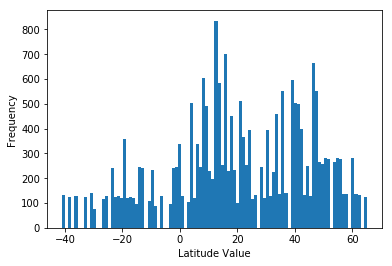

In [176]:
# Plotting DataFrames
import matplotlib.pyplot as plt
raw_data['latitude'].plot(kind='hist', bins=100)
plt.xlabel('Latitude Value')
plt.show()

In [178]:
raw_data.loc[raw_data['Element'] == 'Food']

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,AF,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AF,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21470,ZW,181,Zimbabwe,2949,Eggs,5142,Food,1000 tonnes,-19.02,29.15,...,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [179]:
raw_data_test = raw_data.loc[raw_data['Element'] == 'Food']
pd.DataFrame(raw_data_test.groupby('Area')['Y2013'].sum())

,Y2013
Area,
Afghanistan,21471
Albania,6952
Algeria,63455
Angola,30121
Antigua and Barbuda,119
...,...
Venezuela (Bolivarian Republic of),39706
Viet Nam,105399
Yemen,18325


In [180]:
pd.DataFrame(raw_data_test.groupby('Area')['Y2013'].sum().sort_values(ascending=False))

,Y2013
Area,
"China, mainland",2499252
India,1238335
United States of America,641776
Brazil,312488
Russian Federation,253892
...,...
Kiribati,135
Grenada,122
Antigua and Barbuda,119


In [181]:
pd.DataFrame(raw_data_test.groupby('Area')['Y2013'].sum().sort_values(ascending=False)[:10])

,Y2013
Area,
"China, mainland",2499252
India,1238335
United States of America,641776
Brazil,312488
Russian Federation,253892
Indonesia,237826
Nigeria,228877
Pakistan,180994
Mexico,166591


Text(0,0.5,'Food Produced (tonnes)')

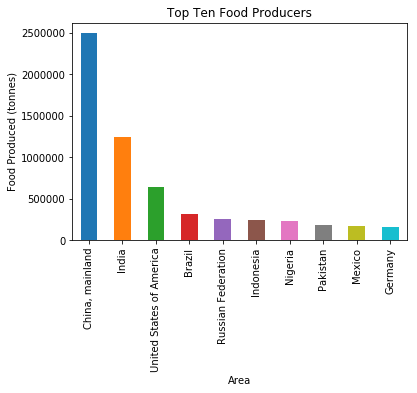

In [182]:
raw_data_test.groupby('Area')['Y2013'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top Ten Food Producers')
plt.ylabel('Food Produced (tonnes)')